In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cv1_dict = {
    "ESM2" : 0.9183974226,
    "genePT" : 0.9068828341,
    "PAIR" : 0.9096510253,
    "gene2vec" : 0.9318400524
}

cv3_dict = {
    "ESM2" : 0.7870777235,
    "genePT" : 0.7494732496,
    "PAIR" : 0.7519166677,
    "gene2vec" : 0.8163541631
}

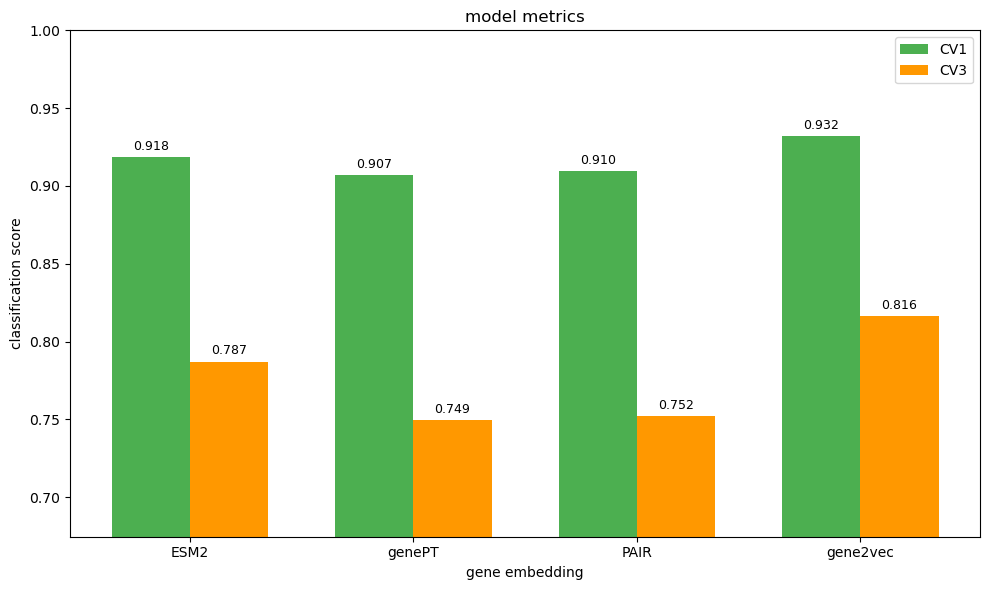

In [7]:
models = list(cv1_dict.keys())
cv1_scores = [cv1_dict[model] for model in models]
cv3_scores = [cv3_dict[model] for model in models]

# 2. Set up parameters for the grouped bar chart
x = np.arange(len(models))  # The label locations (0, 1, 2, 3)
width = 0.35  # The width of the bars

# 3. Create the figure and the axes
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate bar positions:
# CV1 bars are slightly to the left (x - width/2)
rects1 = ax.bar(x - width/2, cv1_scores, width, label='CV1', color='#4CAF50')

# CV3 bars are slightly to the right (x + width/2)
rects2 = ax.bar(x + width/2, cv3_scores, width, label='CV3', color='#FF9800')

# 4. Add labels, title, and custom x-axis tick labels
ax.set_ylabel('classification score')
ax.set_xlabel('gene embedding')
ax.set_title('model metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim(min(min(cv1_scores), min(cv3_scores)) * 0.9, 1.0) # Set Y-limit to focus on relevant range

# 5. Add value labels on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9)

autolabel(rects1)
autolabel(rects2)

# Ensure the layout is tight
fig.tight_layout()

# Show the plot
plt.show()